In [71]:
data = pd.read_csv('data_scaled.csv')
data

,SP,RP,SRP,LRP,FHP,BHP,RANK,RANKDIFF,SA,SRA,FHA,BALANCE,WON
0,0.600,0.400,0.244,0.756,0.511,0.489,1,-0.062078,0.200,-0.512,0.022,0.353155,1.0
1,0.666,0.334,0.194,0.806,0.171,0.829,12,0.062078,0.332,-0.612,-0.658,0.879854,-1.0
2,0.522,0.478,0.295,0.705,0.720,0.280,3,-0.039504,0.044,-0.410,0.440,0.450243,1.0
3,0.558,0.442,0.205,0.795,0.617,0.383,10,0.039504,0.116,-0.590,0.234,0.478155,-1.0
4,0.561,0.439,0.157,0.843,0.578,0.422,3,0.011287,0.122,-0.686,0.156,0.492718,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.552,0.448,0.421,0.579,0.702,0.298,368,2.020364,0.104,-0.158,0.404,0.311893,-1.0
354,0.555,0.445,0.361,0.639,0.638,0.362,28,-0.152374,0.110,-0.278,0.276,0.310680,-1.0
355,0.525,0.475,0.275,0.725,0.615,0.385,55,0.152374,0.050,-0.450,0.230,0.350728,1.0
356,0.512,0.488,0.179,0.821,0.666,0.334,10,-0.744939,0.024,-0.642,0.332,0.513350,1.0


In [67]:
columns = ['SP', 'RP', 'SRP', 'LRP', 'FHP', 'BHP', 'RANK', 'RANKDIFF', 'SA', 'SRA', 'FHA', 'BALANCE']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['WON']), data.WON, train_size=0.8)

In [6]:
from sklearn.neural_network import MLPClassifier

In [7]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_test, y_pred)

#Printing the accuracy
print("Accuracy of MLPClassifier : "'', accuracy(cm))

Accuracy of MLPClassifier :  0.6388888888888888


In [17]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

        -1.0       0.49      0.72      0.58        25
         1.0       0.80      0.60      0.68        47

    accuracy                           0.64        72
   macro avg       0.64      0.66      0.63        72
weighted avg       0.69      0.64      0.65        72



In [18]:
classifier.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (150, 100, 50),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 300,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [19]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [95]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'hidden_layer_sizes':[10,50,100,500,1000],
    'solver':['lbfgs'],
    'activation':['relu'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [300]
}
# Create a based model
model = MLPClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = cv, n_jobs = -1, verbose = 2)

In [35]:
grid_result = grid_search.fit(data[columns], data.WON)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 30 folds for each of 18 candidates, totalling 540 fits
Best: 0.702884 using {'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
0.654392 (0.094604) with: {'activation': 'relu', 'hidden_layer_sizes': 5, 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.627275 (0.101740) with: {'activation': 'relu', 'hidden_layer_sizes': 5, 'learning_rate': 'invscaling', 'solver': 'lbfgs'}
0.644153 (0.086008) with: {'activation': 'relu', 'hidden_layer_sizes': 5, 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
0.663810 (0.078857) with: {'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.679630 (0.066927) with: {'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate': 'invscaling', 'solver': 'lbfgs'}
0.702884 (0.059448) with: {'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
0.688042 (0.063409) with: {'activation': 'relu', 'hidden_layer_sizes': 50, 'lear

/Users/sophiechiang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [96]:
grid_result = grid_search.fit(data[columns], data.WON)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 30 folds for each of 15 candidates, totalling 450 fits
Best: 0.703704 using {'activation': 'relu', 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'max_iter': 300, 'solver': 'lbfgs'}
0.685238 (0.062061) with: {'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'max_iter': 300, 'solver': 'lbfgs'}
0.676825 (0.065268) with: {'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate': 'invscaling', 'max_iter': 300, 'solver': 'lbfgs'}
0.696217 (0.068654) with: {'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate': 'adaptive', 'max_iter': 300, 'solver': 'lbfgs'}
0.686984 (0.068274) with: {'activation': 'relu', 'hidden_layer_sizes': 50, 'learning_rate': 'constant', 'max_iter': 300, 'solver': 'lbfgs'}
0.692540 (0.062831) with: {'activation': 'relu', 'hidden_layer_sizes': 50, 'learning_rate': 'invscaling', 'max_iter': 300, 'solver': 'lbfgs'}
0.688836 (0.071837) with: {'activation': 'relu', 'hidden_layer_sizes': 50, 'learning_rate': 'ad

/Users/sophiechiang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


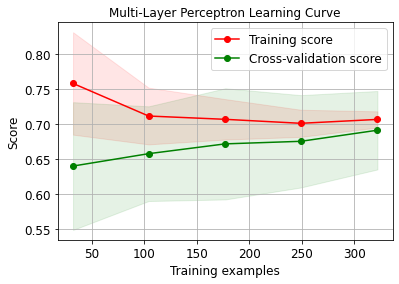

In [99]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(grid_result.best_estimator_, data[columns], data.WON,
                                     cv=cv, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Multi-Layer Perceptron Learning Curve");
plt.savefig('MLP LC', dpi=300)

In [100]:
grid_result.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 100,
 'learning_rate': 'invscaling',
 'max_iter': 300,
 'solver': 'lbfgs'}

In [103]:
grid_result.best_estimator_.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

/Users/sophiechiang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
